# Проект: Исследование стартапов

- Автор: Болохова Ирина
- Дата: 15.06.2025

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

### Цель:

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


### Задачи:

1. Загрузить данные, познакомиться с их содержимым и провести первичную предобработку:
    - вывести общую информацию о данных в каждом датасете, проверить названия столбцов;
    - обработать типы данных в столбцах и проанализировать пропуски.
2. Провести предобработку данных и предварительное исследование:
    - исследовать раунды финансирования по годам;
    - исследовать, зависит ли полнота сведений о сотрудниках от размера компаний;
    - определить, по каким столбцам можно объединять данные;
    - проанализировать пропуски в данных.
3. Провести исследовательский анализ данных:
     - объединить и отфильтровать данные для дальнейшей работы;
     - оценить обычный для рассматриваемого периода размер средств, который предоставлялся компаниям;
     - определить, что означают покупки за 0 или за 1 доллар;
     - определить, какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа поступили данные от поступили сведения от финансовой компании, которые ранее уже были проанализированы внутри компании. 

Данные состоят из нескольких датасетов:
- файл /datasets/acquisition.csv содержит информацию о покупках одними компаниями других компаний;
- файл /datasets/company_and_rounds.csv содержит информацию о компаниях и раундах финансирования;
- файл /datasets/people.csv содержит информацию об образовании сотрудника;
- файл /datasets/education.csv содержит информацию о сотрудниках;
- файл /datasets/degrees.csv содержит информацию о типе образования сотрудника.

Также есть дополнительные датасеты, которые не требуются для выполнения проекта, но связаны с исследуемыми данными:
- файл /datasets/fund.csv содержит информацию о фондах;
- файл /datasets/investment.csv содержит информацию о раундах инвестирования.

#### Описание датасета `acquisition`:
- id — идентификатор покупки;
- acquiring_company_id — идентификатор покупающей компании;
- acquired_company_id — идентификатор покупаемой компании;
- term_code — варианты расчёта;
- price_amount — сумма сделки;
- acquired_at — дата сделки.

#### Описание датасета `company_and_rounds`:
- company ID — идентификатор компании;
- name — название компании;
- category code — категория области деятельности компании;
- status — статус компании;
- founded at — дата инвестирования;
- closed at — дата закрытия компании;
- domain — официальный сайт компании;
- network username — ник компании в сети;
- country code — код страны компании;
- investment rounds — число инвестиционных раундов;
- funding rounds — число раундов финансирования;
- funding total — сумма финансирования;
- milestones — вехи финансирования;
- funding round id — идентификатор этапа финансирования;
- company id — идентификатор компании;
- funded at — дата финансирования;
- funding round type — тип финансирования;
- raised amount — сумма финансирования;
- pre money valuation — предварительная денежная оценка;
- participants — число участников;
- is first round — является ли раунд первым;
- is last round — является раунд последним.

#### Описание датасета `people`:
- id — идентификатор записи об образовании;
- person_id — идентификатор работника;
- instituition — название учебного заведения;
- graduated_at — дата получения образования.

#### Описание датасета `education`:
- id — идентификатор сотрудника;
- first_name — имя сотрудника;
- last_name — фамилия сотрудника;
- company_id — идентификатор компании;
- network_username — ник в социальных сетях.

#### Описание датасета `degrees`:
- id — идентификатор записи;
- object_id — идентификатор сотрудника;
- degree_type — тип образования;
- subject — специальность.

#### Описание датасета `fund`:
- id — идентификатор фонда;
- name — название фонда;
- category_code — категория области деятельности компании;
- founded_at — дата создания фонда;
- domain — сайт фонда;
- network_username — ник фонда в сети;
- country_code — код страны фонда;
- investment_rounds — число инвестиционных раундов;
- invested_companies — число профинансированных компаний;
- milestones — вехи финансирования.

#### Описание датасета `investment`:
- id — идентификатор этапа инвестирования;
- funding_round_id — идентификатор раунда инвестирования;
- company_id — индентификатор компании;
- funding_round_type — тип финансирования;
- fund_id — идентификатор фонда.

### Содержимое проекта

1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ объединённых таблиц.
4. Итоговые выводы и рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка


### 1.1. Вывод общей информации, исправление названия столбцов



Начнём с загрузки библиотек и датасетов. 

Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. 

Данные датасетов сохраним в переменных: `acquisition`, `company_and_rounds`, `people`, `education`, `degrees`, `fund` и `investment`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Выгружаем данные в переменные acquisition, company_and_rounds, people, education, degrees, fund и investment

try:
    acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
except:
    acquisition = pd.read_csv('acquisition.csv')

try:
    company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
except:
    company_and_rounds = pd.read_csv('company_and_rounds.csv')

try:
    people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
except:
    people = pd.read_csv('people.csv')

try:
    education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
except:
    education = pd.read_csv('education.csv')

try:
    degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
except:
    degrees = pd.read_csv('degrees.csv')

try:
    fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
except:
    fund = pd.read_csv('fund.csv')

try:
    investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
except:
    investment = pd.read_csv('investment.csv')


Познакомимся с данными основных датасетов.

Начнем с датасета `acquisition`: выведем о них общую информацию и первые строки датасета.

In [3]:
# Выводим информацию о датасете
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [4]:
# Выводим первые строки датасета на экран
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датасет `acquisition.csv` содержит 6 столбцов и 9406 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
 - Названия столбцов единого вида и не требуют переименования.
 - Представленные данные хранятся в типах данных `object` и `int64`. 
   Значения в столбцe `acquired_at` показывают дату сделки, его тип данных следует привести к типу времени и даты. 
   Значения в остальных столбцах имеют верный тип данных.
 - Пропуски содержатся только в столбцах `term_code` и `acquired_at`. 
 - Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета `company_and_rounds`: выведем о них общую информацию и первые строки датасета.

In [5]:
# Выводим информацию о датасете
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [6]:
# Выводим первые строки датасета на экран
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строк, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:
 - Названия столбцов необходимо привести к единому виду snake_case.
 - Представленные данные хранятся в типах данных `object` и `float64`. 
   Значения в столбцах `founded at`, `closed at` и `funded at` показывают даты, их тип данных следует привести к типу времени и даты. 
   Значения в остальных столбцах имеют верный тип данных. **(Можно привести часть столбцов к целочисленным после работы с пропусками)**
 - Во всех столбцах содержатся пропуски. 
 - Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Сразу приведем названия столбцов к snake_case

Для переименования используем метод `rename()`, которому передадим словарь с новыми названиями столбцов. Однако сначала выведем все названия на экран — так будет удобнее составлять словарь.

In [7]:
# Выводим названия столбцов датасета company_and_rounds
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [8]:
# Передаём методу rename() словарь с названиями столбцов
company_and_rounds = company_and_rounds.rename(columns={'company  ID': 'company_ID',
                                  'name': 'name',
                                  'category  code': 'category_code',
                                  'status': 'status',
                                  'founded  at': 'founded_at',
                                  'closed  at': 'closed_at',
                                  'domain': 'domain',
                                  'network  username': 'network_username',
                                  'country  code': 'country_code',
                                  'investment  rounds': 'investment_rounds',
                                  'funding  rounds': 'funding_rounds',
                                  'funding  total': 'funding_total',
                                  'milestones': 'milestones',
                                  'funding  round  id': 'funding_round_id',
                                  'company  id': 'company_id',
                                  'funded  at': 'funded_at',
                                  'funding  round  type': 'funding_round_type',
                                  'raised  amount': 'raised_amount',
                                  'pre  money  valuation': 'pre_money_valuation',
                                  'participants': 'participants',
                                  'is  first  round': 'is_first_round',
                                  'is  last  round': 'is_last_round'})

In [9]:
# Проверим результат
company_and_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Теперь названия столбцов приведены к единому виду.


Познакомимся с данными датасета `people`: выведем о них общую информацию и первые строки датасета.

In [10]:
# Выводим информацию о датасете
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [11]:
# Выводим первые строки датасета на экран
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датасет `people.csv` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.

После первичного анализа данных можно сделать следующие выводы:
 - Названия столбцов единого вида и не требуют переименования.
 - Представленные данные хранятся в типах данных `object`, `int64` и `float64`. 
   Значения в столбце `company_id`содержит целочисленные данные и показывает id компании. 
   Значения в остальных столбцах имеют верный тип данных. 
 - Пропуски содержатся в столбцах `company_id`, `first_name`, `last_name` и `network_username`. 
 - Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета `education`: выведем о них общую информацию и первые строки датасета.

In [12]:
# Выводим информацию о датасете
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [13]:
# Выводим первые строки датасета на экран
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датасет `education.csv` содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудников.
 
 После первичного анализа данных можно сделать следующие выводы:
 - Названия столбцов единого вида и не требуют переименования.
 - Представленные данные хранятся в типах данных object и int64. 
   Значения в столбцe `graduated_at` показывают дату получения образования, его тип данных следует привести к типу времени и даты. Значения в остальных столбцах имеют верный тип данных.
 - Пропуски содержатся в столбцах `instituition` и `graduated_at`. 
 - Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета `degrees`: выведем о них общую информацию и первые строки датасета.

In [14]:
# Выводим информацию о датасете
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [15]:
# Выводим первые строки датасета на экран
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датасет `degrees.csv` содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудников.
 

После первичного анализа данных можно сделать следующие выводы:
 - Названия столбцов единого вида и не требуют переименования.
 - Представленные данные хранятся в типах данных `object` и `int64`. Значения в столбцах имеют верный тип данных.
 - Пропуски содержатся в столбцах `degree_type` и `subject`. 
 - Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### 1.2. Смена типов и анализ пропусков



Необходимо изменить тип данных для столбца `acquired_at` датасета `acquisition`, для столбцов `founded_at`, `closed_at` и `funded_at` датасета `company_and_rounds`, а также для столбца `graduated_at` датасета `education` с `object` на `datetime64`.

Для этого применим метод `.to_datetime()`.

In [16]:
# Переведем во временной формат столбец acquired_at датасета acquisition
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], format='%Y-%m-%d')
print(acquisition['acquired_at'])

0      2007-05-30
1      2007-07-01
2      2007-05-01
3      2007-06-01
4      2007-07-01
          ...    
9402   2013-12-11
9403   2013-12-09
9404   2007-07-03
9405   2013-12-12
9406   2013-12-12
Name: acquired_at, Length: 9407, dtype: datetime64[ns]


In [17]:
# Переведем во временной формат столбец founded_at датасета company_and_rounds
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], format='%Y-%m-%d')
print(company_and_rounds['founded_at'])

0        2005-10-17
1        2005-10-17
2        2005-10-17
3               NaT
4               NaT
            ...    
217769          NaT
217770          NaT
217771          NaT
217772          NaT
217773          NaT
Name: founded_at, Length: 217774, dtype: datetime64[ns]


In [18]:
# Переведем во временной формат столбец closed_at датасета company_and_rounds
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], format='%Y-%m-%d')
print(company_and_rounds['closed_at'])

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
217769   NaT
217770   NaT
217771   NaT
217772   NaT
217773   NaT
Name: closed_at, Length: 217774, dtype: datetime64[ns]


In [19]:
# Переведем во временной формат столбец closed_at датасета company_and_rounds
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], format='%Y-%m-%d')
print(company_and_rounds['funded_at'])

0        2005-10-01
1        2007-01-01
2        2008-05-19
3               NaT
4               NaT
            ...    
217769   2011-01-31
217770   2011-01-13
217771   2012-05-31
217772   2013-12-03
217773   2013-12-04
Name: funded_at, Length: 217774, dtype: datetime64[ns]


In [20]:
# Переведем во временной формат столбец closed_at датасета company_and_rounds
education['graduated_at'] = pd.to_datetime(education['graduated_at'], format='%Y-%m-%d')
print(education['graduated_at'])

0               NaT
1        1990-01-01
2        1992-01-01
3        2006-01-01
4               NaT
            ...    
109605          NaT
109606          NaT
109607          NaT
109608          NaT
109609          NaT
Name: graduated_at, Length: 109610, dtype: datetime64[ns]


Теперь проанализируем количество пропусков в каждом датасете.

При первичном анализе мы обнаружили пропуски в столбцах `term_code` и `acquired_at` датасета `acquisition`, в столбцах `company_id`, `first_name`, `last_name` и `network_username` датасета `people`, в столбцах `instituition` и `graduated_at` датасета `education`, в столбцах `degree_type` и `subject` датасета `degrees`, а также во всех столбцах датасета `company_and_rounds`. 

Узнаем абсолютное и относительное количество пропусков в каждом из этих столбцов.

In [21]:
# Применяем метод isna() к датасету acquisition
print('Количество пропусков в датасете acquisition')
acquisition.isna().sum()

Количество пропусков в датасете acquisition


id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [22]:
# Подсчитываем долю строк с пропусками
print('Доля строк с пропусками в датасете acquisition')
acquisition.isna().sum() / acquisition.shape[0]

Доля строк с пропусками в датасете acquisition


id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

In [23]:
# Применяем метод isna() к датасету people
print('Количество пропусков в датасете people')
people.isna().sum()

Количество пропусков в датасете people


id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [24]:
# Подсчитываем долю строк с пропусками
print('Доля строк с пропусками в датасете people')
people.isna().sum() / people.shape[0]

Доля строк с пропусками в датасете people


id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

In [25]:
# Применяем метод isna() к датасету education
print('Количество пропусков в датасете education')
education.isna().sum()

Количество пропусков в датасете education


id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [26]:
# Подсчитываем долю строк с пропусками
print('Доля строк с пропусками в датасете education')
education.isna().sum() / education.shape[0]

Доля строк с пропусками в датасете education


id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

In [27]:
# Применяем метод isna() к датасету degrees
print('Количество пропусков в датасете degrees')
degrees.isna().sum()

Количество пропусков в датасете degrees


id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [28]:
# Подсчитываем долю строк с пропусками
print('Доля строк с пропусками в датасете degrees')
degrees.isna().sum() / degrees.shape[0]

Доля строк с пропусками в датасете degrees


id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

In [29]:
# Применяем метод isna() к датасету company_and_rounds
print('Количество пропусков в датасете company_and_rounds')
company_and_rounds.isna().sum()

Количество пропусков в датасете company_and_rounds


company_ID                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [30]:
# Подсчитываем долю строк с пропусками
print('Доля строк с пропусками в датасете company_and_rounds')
company_and_rounds.isna().sum() / company_and_rounds.shape[0]

Доля строк с пропусками в датасете company_and_rounds


company_ID             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id             0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

По итогам анализа пропусков получим:

- в датасете `acquisition`:
    - в столбце `term_code` обнаружено 7576 пропусков — это 80.5% данных
    - в столбце `acquired_at` обнаружено 29 пропусков — это менее 1% данных    
 
- в датасете `people`:
    - в столбце `first_name` обнаружено 5 пропусков — это менее 1% данных
    - в столбце `last_name` обнаружен 1 пропуск — это менее 1% данных
    - в столбце `company_id` обнаружено 192094 пропусков — это 85% данных
    - в столбце `network_username` обнаружено 187842 пропусков — это 83% данных, причиной может быть отсутствие социальных сетей или нежелание работника указывать свой ник

- в датасете `education`:
    - в столбце `instituition` обнаружено 55 пропусков — это менее 1% данных
    - в столбце `graduated_at` обнаружено 51556 пропусков — это 47% данных, причиной может быть неоконченное образование либо работник находтся в процессе обучения

- в датасете `degrees`:
    - в столбце `degree_type` обнаружено 11218 пропусков — это 10% данных
    - в столбце `subject` обнаружено 28312 пропусков — это 26% данных

  Пропуски в этом датасете могут быть вызваны отсутствием данных об образовании сотрудника (например, неокончено в принципе или в процессе получения).
     
     
- в датасете `company_and_rounds`:
    количество пропуско варьируется от менее 1% до 76% данных.


Все найденные пропуски не будем удалять или заменять, чтобы они не повлияли на дальнейший анализ.

### Промежуточные выводы

В процессе знакомства с данными и первичной предобработки были выполнены следующие этапы:

 - Загружены все датасеты и получена информация о них.
 - Скорректированны названия столбцов датасета `company_and_rounds` - приведены к snake_case.
 - Скорректированны типы данных в столбцах, которых хранят значения дат.
 - Проанализированны пропуски данных с датасетах.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам



Составим сводную таблицу, в которой для каждого года будет показываться средний размер средств, выделяемый в рамках одного раунда и общее количество раундов финансирования за год (от 50 раундов и больше). Также добавим в таблицу информацию о количестве стартапов в год для большей информативности.

Для начала выделим из столбца `funded_at` год, а затем составим таблицу.

In [31]:
print(company_and_rounds['funded_at'])
print(company_and_rounds['funding_rounds'])

0        2005-10-01
1        2007-01-01
2        2008-05-19
3               NaT
4               NaT
            ...    
217769   2011-01-31
217770   2011-01-13
217771   2012-05-31
217772   2013-12-03
217773   2013-12-04
Name: funded_at, Length: 217774, dtype: datetime64[ns]
0         3.0
1         3.0
2         3.0
3         0.0
4         0.0
         ... 
217769    NaN
217770    NaN
217771    NaN
217772    NaN
217773    NaN
Name: funding_rounds, Length: 217774, dtype: float64


In [32]:
# Выделим из столбца funded_at год
company_and_rounds['funded_year'] = company_and_rounds['funded_at'].dt.year
print(company_and_rounds['funded_year'])

0         2005.0
1         2007.0
2         2008.0
3            NaN
4            NaN
           ...  
217769    2011.0
217770    2011.0
217771    2012.0
217772    2013.0
217773    2013.0
Name: funded_year, Length: 217774, dtype: float64


In [33]:
# Составим сводную таблицу с помощью метода pivot_table()
rounds_table = pd.pivot_table(
    company_and_rounds,
    values=['raised_amount','funding_rounds','company_ID'],
    index='funded_year',
    aggfunc={'raised_amount':'median', 'funding_rounds':'sum', 'company_ID':'count'}
)
display(rounds_table)

,company_ID,funding_rounds,raised_amount
funded_year,,,
1960.0,9,16.0,0.0
1973.0,1,1.0,0.0
1974.0,2,2.0,0.0
1984.0,3,3.0,41000.0
1985.0,1,1.0,0.0
1987.0,2,2.0,1250000.0
1989.0,1,1.0,15000.0
1990.0,1,1.0,1000000.0
1992.0,1,2.0,2000000.0


Для подсчета типичного размера средств, выделяемого в рамках одного раунда, первоначально использовалось определение среднего арифметического `mean`, но результаты показали то слишком большие, то слишком маленькие значения, поэтому в конечном варианте используется определение медианного значения `median`.

In [34]:
# Отфильтруем таблицу и оставим данные, где общее количество раундов финансирования за год более 50 
rounds_table = rounds_table[rounds_table['funding_rounds'] > 50]
display(rounds_table)

,company_ID,funding_rounds,raised_amount
funded_year,,,
1998.0,29,72.0,100000.0
1999.0,76,268.0,2000000.0
2000.0,125,403.0,4200000.0
2001.0,95,302.0,3000000.0
2002.0,115,385.0,4200000.0
2003.0,154,569.0,3000000.0
2004.0,286,1057.0,5000000.0
2005.0,1624,4157.0,5500000.0
2006.0,2409,6295.0,5000000.0


На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования, количества раундов финансирования и количества стартапов.

Для графиков дополнительно построим сглаживающие линии, по которым проще оценить тенденцию данных с помощью скользящего среднего (аналог параметра KDE, адаптированный для линейных графиков).

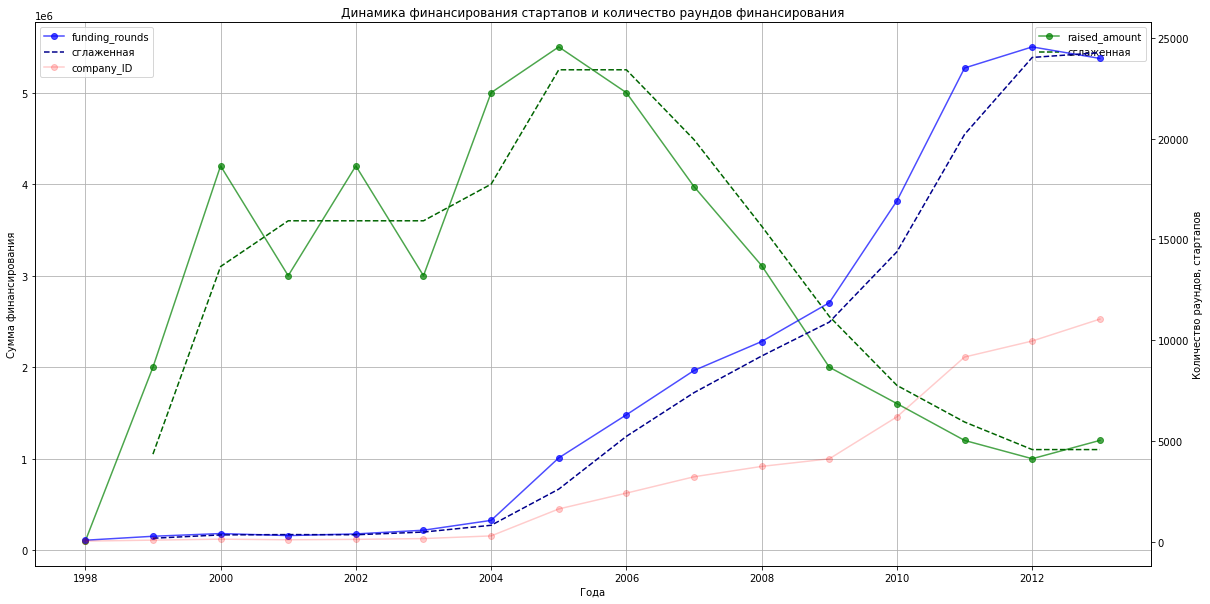

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 10))

# Строим линейный график по полученной таблице для столбца raised_amount
rounds_table['raised_amount'].plot(kind='line', 
                                   color='green',
                                   alpha=0.7,
                                   marker='o',
                                  label='raised_amount')

# Добавляем сглаживающую линию 
smooth = rounds_table['raised_amount'].rolling(window=2).mean()
smooth.plot(color='darkgreen', linestyle='--', label='сглаженная')

# Добавляем заголовок и метки осей
plt.title('Динамика финансирования стартапов и количество раундов финансирования')
plt.xlabel('Года')
plt.ylabel('Сумма финансирования')
plt.grid(True)
plt.legend()

# Создаем 2 вертикальную ось для второго графика
ax2 = plt.twinx()

# Строим линейный график по полученной таблице для столбца funding_rounds
rounds_table['funding_rounds'].plot(kind='line', 
                                   color='blue',
                                   marker='o',
                                   alpha=0.7, 
                                   ylabel='Количество раундов, стартапов',
                                   label='funding_rounds', 
                                   legend=True
                                   )

# Добавляем сглаживающую линию 
smooth2 = rounds_table['funding_rounds'].rolling(window=2).mean()
smooth2.plot(color='darkblue', linestyle='--', label='сглаженная')

# Строим линейный график по полученной таблице для столбца company_ID
rounds_table['company_ID'].plot(kind='line', 
                                  color='red',
                                   marker='o',
                                   alpha=0.2,
                                   #legend=True,
                                   label='company_ID')

plt.legend()
# Отображаем график
plt.show()

На основе полученных данных можно сказать, что:

Максимальный типичный размер средств, которые стартапы получали в рамках одного раунда финансирования, наблюдался в **2005** году и составлял **5500000**. Максимальная сумма финансирования совпала с резким ростом количества стартапов и увеличением раундов финансирования.

В 2013 году сохраняется тенденция увеличения количества раундов финансирования с одновременным снижением суммы финансирования каждого раунда. Общий тренд хорошо виден при выводе сглаженных данных.

Относительно данных за 2012 год можно наблюдать незначительное уменьшение количества раундов финансирования с увеличением суммы каждого раунда.

Если проанализировать картину в целом, то можно сказать, что в 2005 году произошел переломный момент, вызванный резким увеличением количества стартапов с одновременным формированием новой схемы финансирования. А именно с увеличением количества раундов финансирования и уменьшением суммы каждого.



### 2.2. Люди и их образование



Для того, чтобы оценить зависимость полноты сведений об образовании сотрудников от размера компании, необходимо объединить датасеты `people` и `education`, затем разделить все компании на группы по количеству сотрудников и определить среднюю долю сотрудников без информации об образовании в каждой группе.

Соединим данные по столбцам `id` для `people` и `person_id` для `education`, используя значение параметра `how` `'left'`. Это позволит оставить все заведения.

In [36]:
# Соединяем данные в единый датафрейм people_education_0
people_education_0 = pd.merge(people, education, left_on='id', right_on='person_id', how='left')
display(people_education_0)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


Также присоединим датасет `degrees`, чтобы оценить, повлияют ли эти данные на итоговый результат.

In [37]:
# Соединяем данные в единый датафрейм people_education
people_education = pd.merge(people_education_0, degrees, left_on='id_y', right_on='id', how='left')
display(people_education)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,p:10,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,25958.0,p:174088,M.B.B.S.,Medicine
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,18871.0,p:118386,PhD,Journalism
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


Получили новую таблицу `people_education` состоящую из 13 столбцов и 267694 строк.

Проверим эту таблицу на наличие явных дубликатов - сначала всей таблицы, а затем проверим столбцы `first_name`, `last_name` и `instituition`, чтобы исключить наличие повторяющихся сотрудников. 

In [38]:
#Посчитаем количество явных дубликатов во всей таблице
people_education.duplicated().sum()

0

In [39]:
#Посчитаем количество явных дубликатов в столбцах first_name, last_name и instituition
people_education.duplicated(subset=['first_name', 'last_name', 'instituition']).sum()

15287

In [40]:
# Выведем получившиеся дубликаты
print(people_education[people_education.duplicated(subset=['first_name', 'last_name', 'instituition'], keep=False)])

          id_x first_name    last_name  company_id network_username     id_y  \
15      100016     Thomas  F. Ackerman         NaN              NaN      NaN   
28      100031    Sandeep        Hegde     81576.0     sandeephegde  14436.0   
54      100067      Simon         Hill         NaN              NaN      NaN   
65      100077         KC           Oh         NaN          okaysee  48613.0   
66      100077         KC           Oh         NaN          okaysee  48614.0   
...        ...        ...          ...         ...              ...      ...   
267663   99977       Tian           He         NaN         hetianye  48610.0   
267664   99977       Tian           He         NaN         hetianye  48611.0   
267673   99985       Mark         Sims         NaN              NaN      NaN   
267692  175827     mahesh        kumar         NaN    socialnethubs      NaN   
267693  178190       Alex        Smith         NaN   esocialnetlike      NaN   

        person_id                      

Выяснили, что полных явных дубликатов нет, а если смотреть по столбцам `first_name`, `last_name` и `instituition` - получилось 15287 дубликата. Вывели полученные предположительные дубликаты - по полученным данным нельзя однозначно сказать, что они являются дубликатами, поэтому оставляем данные без изменений.

Далее создадим новый столбец `is_ed`, в который занесем бинарный признак, показывающий наличие информации об образовании у сотрудника:
- логическое значение `True` — если у сотрудника не указана информация об образовании;
- логическое значение `False` — если у сотрудника указана информация об образовании.

Определять, указана ли информация об образовании сотрудника, будем по столбцам `graduated_at` и `instituition` - считаем, что если нет данных в одним из столбцов - информация об образовании не указана.

Использовать для определения наличия информации об образовании столбцов `degree_type` и `subject` не очень корректно, т.к. тип образования и специальность могут дополнить информацию об образовании, но не обязательная ее часть. 

In [41]:
# Создаём столбец is_ed  
people_education['is_ed'] = people_education[['graduated_at', 'instituition']].isna().any(axis=1)
people_education.head(30)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject,is_ed
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,p:10,NaN,Computer Science,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01,83604.0,p:100006,MBA,Strategy & Marketing,False
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True


Сгруппируем данные по компаниям, и для каждой компании посчитаем количество сотрудников. Выведем в эту таблицу также долю сотрудников без образования из столбца `is_ed`.

А затем разделим компании на группы по количеству сотрудников:

- стартапы из 1 человека (one) - 1 сотрудник;
- микростартапы (micro) - 2 сотрудника;
- малые стартапы (small) - 3-7 сотрудников;
- средние стартапы (mean) - 8-20 сотрудников;
- крупные стартапы (large) - 21-100 сотрудников;
- мегастартапы (mega) - более 100 сотрудников.

Такое разделение стартапов по количеству сотрудников схоже с разделением обычных компаний по количеству сотрудников на микропредприятие, малое предприятие, среднее предприятие.

In [42]:
# Определим минимальное  и максимальное количество сотрудников в компании
print(people.groupby('company_id')['id'].count().min())
print(people.groupby('company_id')['id'].count().max())

1
244


In [43]:
# Сгруппируем данные по компаниям и посчитаем количество сотрудников и долю сотрудников без образования
company_people = people_education.groupby('company_id').agg({'id_x':'count', 'is_ed':'mean'})
display(company_people)

,id_x,is_ed
company_id,,
1.0,3,1.000000
2.0,1,0.000000
3.0,5,0.400000
4.0,18,0.222222
5.0,84,0.583333
...,...,...
285897.0,2,0.500000
285953.0,1,1.000000
285972.0,2,1.000000


In [44]:
# Разделим полученные данные на группы по количеству сотрудников
company_people['group_company'] = pd.cut(company_people['id_x'], 
                                        bins=[0, 1, 2, 7, 20, 100, 244],
                                        labels=['one', 'micro', 'small', 'mean', 'large', 'mega'])
display(company_people)

,id_x,is_ed,group_company
company_id,,,
1.0,3,1.000000,small
2.0,1,0.000000,one
3.0,5,0.400000,small
4.0,18,0.222222,mean
5.0,84,0.583333,large
...,...,...,...
285897.0,2,0.500000,micro
285953.0,1,1.000000,one
285972.0,2,1.000000,micro


Получили таблицу, в которой каждой компании соответствует ее категория по количеству сотрудников.

Теперь для каждой категории компании определим среднюю долю сотрудников без информации об образовании.

In [45]:
# Определим долю сотрудников без информации об образовании для каждой категории
category_company = company_people.groupby('group_company')['is_ed'].mean()
display(category_company)

group_company
one      0.672085
micro    0.407920
small    0.450496
mean     0.561601
large    0.581432
mega     0.628174
Name: is_ed, dtype: float64

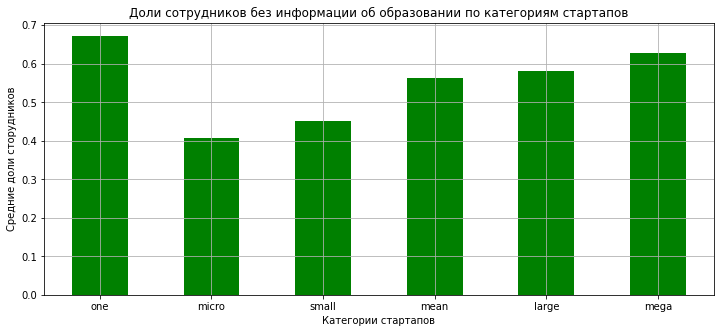

In [46]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
category_company.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Доли сотрудников без информации об образовании по категориям стартапов',
               color='green' #настраиваем цвет графика
)

# Настраиваем оформление графика
plt.xlabel('Категории стартапов')
plt.ylabel('Средние доли сторудников')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Вычисления показали, что во всех категориях стартапов, независимо от численности сотрудников, доля тех, кто не указал уровень образования, довольно велика - более 40%.

Минимальная доля таких сотрудников наблюдается для микростартапов - 41%.
Максимальная доля наблюдается для стартапов из 1 человека - 67%.

При этом доля сотрудников без информации об образовании увеличивается с увеличением размера компании, за исключением стартапов из 1 человека.

### 2.3. Объединять или не объединять — вот в чём вопрос



Для того, чтобы определить, можно ли объединять датасеты по столбцу `network_username`, необходимо изучить данные, которые в нем содержатся в различных таблицах, и найти возможные совпадения.

Для начала обратимся к описанию данных. Столбец `network_username` находится в следующих таблицах:
- `company_and_rounds` - в ней он содержит ник компании в сети;
- `people` - в ней он содержит ник сотрудника в соцсетях;
- `fund` - в ней содержит ник фонда в сети.

По описанию это разные данные.

Посмотрим, что содержат эти столбцы.

In [47]:
# Выведем уникальные значения столбца network_username для таблицы company_and_rounds
print(company_and_rounds['network_username'].unique())

['BachelrWetpaint' nan 'Hostnine' ... 'networkzend' 'pPhotonet' 'Photonet']


In [48]:
# Выведем уникальные значения столбца network_username для таблицы people
print(people['network_username'].unique())

[nan 'jobsbostontech' 'fbroulette' ... 'itechsocialnet' 'socialnethubs'
 'esocialnetlike']


In [49]:
# Выведем уникальные значения столбца network_username для таблицы fund
print(fund['network_username'].unique())

[nan 'greylockvc' 'imi_vc' ... 'CalSTRS' 'haystack_fund' 'fbFund']


По полученным уникальным значениям на первый взгляд совпадений нет.

Дополнительно проверим наличие значений каждого столбца в двух других с помощью метода isin().

In [50]:
# Проверим есть ли значение столбца network_username таблицы company_and_rounds в таблице people
company_and_rounds['network_username'].isin(people['network_username'])

0         False
1         False
2         False
3          True
4          True
          ...  
217769     True
217770     True
217771     True
217772     True
217773     True
Name: network_username, Length: 217774, dtype: bool

In [51]:
# Посчитаем количество совпадений
company_and_rounds['network_username'].isin(people['network_username']).sum()

124734

In [52]:
# Посчитаем долю от всех данных столбца
company_and_rounds['network_username'].isin(people['network_username']).sum() / company_and_rounds.shape[0]

0.5727680990384527

In [53]:
# Проверим есть ли значение столбца network_username таблицы company_and_rounds в таблице fund
company_and_rounds['network_username'].isin(fund['network_username'])

0         False
1         False
2         False
3          True
4          True
          ...  
217769     True
217770     True
217771     True
217772     True
217773     True
Name: network_username, Length: 217774, dtype: bool

In [54]:
# Посчитаем количество совпадений
company_and_rounds['network_username'].isin(fund['network_username']).sum()

122325

In [55]:
# Посчитаем долю от всех данных столбца
company_and_rounds['network_username'].isin(fund['network_username']).sum() / company_and_rounds.shape[0]

0.561706172454012

In [56]:
# Проверим есть ли значение столбца network_username таблицы people в таблице fund
people['network_username'].isin(fund['network_username'])

0          True
1          True
2          True
3          True
4          True
          ...  
226704     True
226705    False
226706    False
226707    False
226708    False
Name: network_username, Length: 226709, dtype: bool

In [57]:
# Посчитаем количество совпадений
people['network_username'].isin(fund['network_username']).sum()

187921

In [58]:
# Посчитаем долю от всех данных столбца
people['network_username'].isin(fund['network_username']).sum() / people.shape[0]

0.8289084244560208

По полученным данным видим, что число совпадений достаточно большое и процент совпадений во всех случаях превышает 50%.

Но по выведенным ранее уникальным значения видим, в каждом из этих столбцов имеются значения `nan`, значит в каждом столбце есть пропуски.

Посчитаем количество пропусков в данных столбцах, чтобы проверить гипотезу о том, что совпадающие значения есть пропуски.

In [59]:
# Проверим количество пропусков в столбце network_username таблицы company_and_rounds
company_and_rounds['network_username'].isna().sum()

122240

In [60]:
# Проверим количество пропусков в столбце network_username таблицы people
people['network_username'].isna().sum()

187842

In [61]:
# Проверим количество пропусков в столбце network_username таблицы fund
fund['network_username'].isna().sum()

9503

По итогам расчетов получили, что в столбце `network_username` таблицы `company_and_rounds` **124734** совпадений со столбцом из таблицы `people` и **122325** совпадений из таблицы `fund`. Всего же в столбце `network_username` таблицы `company_and_rounds` **122240** пропуска, то есть точных совпадений мало.

А если сравнить таблицы `people` и `fund`, то получим **187921** совпадений, при этом в этом столбце таблицы `people` всего **187842** пропуска, то есть точных совпадений очень мало.

Учитывая малое количество точных совпадений данных в столбцах `network_username` таблиц `company_and_rounds`, `people` и `fund` приходим к выводу, что нельзя использовать этот столбец для объединения таблиц.


### 2.4. Проблемный датасет и причина возникновения пропусков



In [62]:
# Посмотрим еще раз на данные в датасете company_and_rounds
company_and_rounds.head(20)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что в данном датасете много пропусков. 

Поднимем информацию о пропусках в данном датасете: пропуски находятся во всех столбцах и количество пропусков варьируется от 0,1% до 76% от общего количества данных.

В данном датасете находятся данные как в общем о компании (название, сайт, ник в сети, область деятельности, статус и код страны), так и информация непосредственно о финансировании (дата финансирования, количество раундов, общая сумма финансироания и сумма финансирования в одном раунде).

Заказчик считает, что раньше данные, содержащиеся в этом датасете, хранились по другому. Об этом может говорить задублировавшийся столбец `company_id` в середине таблицы.

Разделим датасет на два новых, в одном будут содержаться данные в общем по компаниям, а во втором вся информация о финансировании.


In [63]:
# Создадим новую таблицу df_company_0, в которой будут содержаться общие данные о компаниях
df_company_0 = company_and_rounds[['company_ID', 'name', 'category_code', 'status', 'founded_at',
                                 'closed_at', 'domain', 'network_username', 'country_code',
                                 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]
display(df_company_0)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получили таблицу, состоящую из 13 столбцов, отражающую основную общую информацию о компаниях.

По первым строчкам таблицы видим, что компании дублируются (из-за различных данных по раундам финансироания, которые остались во второй части основной таблицы).

Для удобства последующего анализа данных этой таблицы удалим все дубликаты.

In [64]:
# Псчитаем количество явных дубликатов
df_company_0.duplicated().sum()

21220

In [65]:
# Покажем найденные дубликаты
print(df_company_0[df_company_0.duplicated()])

        company_ID      name category_code     status founded_at closed_at  \
1              1.0  Wetpaint           web  operating 2005-10-17       NaT   
2              1.0  Wetpaint           web  operating 2005-10-17       NaT   
22         10015.0    Fitbit        health  operating 2007-10-01       NaT   
23         10015.0    Fitbit        health  operating 2007-10-01       NaT   
24         10015.0    Fitbit        health  operating 2007-10-01       NaT   
...            ...       ...           ...        ...        ...       ...   
217769         NaN       NaN           NaN        NaN        NaT       NaT   
217770         NaN       NaN           NaN        NaN        NaT       NaT   
217771         NaN       NaN           NaN        NaN        NaT       NaT   
217772         NaN       NaN           NaN        NaN        NaT       NaT   
217773         NaN       NaN           NaN        NaN        NaT       NaT   

                  domain network_username country_code  investm

In [66]:
# Удалим найденные дубликаты и выведем получившиеся данные
df_company = df_company_0.drop_duplicates()
display(df_company)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


Получили новую таблицу `df_company` без дубликатов, отражающие данные для каждой отдельной компании.

Посчитаем количество и долю удаленных данных.

In [67]:
deleted_rows = len(df_company_0) - len(df_company)
deleted_rows_percent = round(deleted_rows / len(df_company_0) * 100)
print(f'Всего удалено {deleted_rows} строк, что составляет {deleted_rows_percent}% данных.')

Всего удалено 21220 строк, что составляет 10% данных.


Теперь создадим вторую таблицу `df_rounds`, содержащую всю информацию о финансировании компаний.

In [68]:
# Создадим новую таблицу df_rounds, в которой будут содержаться общие данные о компаниях
df_rounds = company_and_rounds[['company_ID', 'name', 'funding_round_id', 'funded_at',
                                 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants',
                                 'is_first_round', 'is_last_round', 'funded_year']]
display(df_rounds)

,company_ID,name,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,56454.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,NaN,NaN,56542.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,NaN,NaN,56543.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,NaN,NaN,56928.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


In [69]:
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   funding_round_id     52928 non-null   float64       
 3   funded_at            52680 non-null   datetime64[ns]
 4   funding_round_type   52928 non-null   object        
 5   raised_amount        52928 non-null   float64       
 6   pre_money_valuation  52928 non-null   float64       
 7   participants         52928 non-null   float64       
 8   is_first_round       52928 non-null   float64       
 9   is_last_round        52928 non-null   float64       
 10  funded_year          52680 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 18.3+ MB


Получили таблицу состоящую из 11 столбцов и отражающая всю информацию о раундах финансирования компаний.

Проверим, есть ли данной таблице явные дубликаты.

In [70]:
# Посчитаем количество явных дубликатов
df_rounds.duplicated().sum()

0

Явных дубликатов в полученной таблице не найдено.

По общей информации о таблицу видим, что в таблице много пропусков. Посчитаем и удалим пропуски по столбцу `funding_round_type`.

In [71]:
# Посчитаем пропуски по столбцу funding_round_type
df_rounds['funding_round_type'].isna().sum()

164846

In [72]:
# Удалим пропуски по колонке
df_rounds=df_rounds.dropna(subset=['funding_round_type'])
display(df_rounds)

,company_ID,name,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
15,1001.0,FriendFeed,1644.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,2008.0
20,10014.0,Mobclix,6682.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,56454.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,NaN,NaN,56542.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,NaN,NaN,56543.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,NaN,NaN,56928.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


Были удалены 164846 пропусков, в итоге получена таблица, содержащая 52928 строк.

В результате обработки датасета `company_and_rounds` получены 2 отдельных датасета:
- `df_company` - содержит общую информацию по каждой компании, не содержит дубликатов и позволит в дальнейшем отобрать компании по параметрам и расчитать показатели без промежуточных агрегаций;
- `df_rounds` - содержит информацию только о раундах финансирования и позволит более подробно изучить эту часть данных без привязки к общим данным о компании.

### Промежуточные выводы.

В процессе предобработки и предварительного анализа данных были выполнены следующие этапы:

 - Определена тенденция по количеству раундов и выделенных в рамках одного раунда средств финансирования в зависимочти от года.
 - Определена зависимость полноты сведений об образовании сотрудников от размера компании.
 - Проведена оценка возможности использования столбца `network_username` для объединения данных.
 - Датасет `company_and_rounds` разделен на два отдельных датасета, отражающих информацию о компаниях в целом и информацию о раундах финансирования.
 - В новом датасете `df_company` были выявлены и удалены дубликаты, остальные исследуемые датасеты были проверены на наличие явных дубликатов - их нет.



## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных



Для дальшего анализа данных объединим датасеты `df_company` (содержит информацию о компаниях) и `acquisition` (содержит информацию о покупках одними компаниями других компаний) в единый датасет `company_and_acquisition`.

Для соединения будем спользовать столбец `company_ID` в таблице `df_company` и столбец `acquired_company_id` в таблице `acquisition` (так как в дальнейшем будем анализировать купленные компании). Соединим данные, используя значение параметра `how`  `'left'`. Это позволит оставить все компании.

In [73]:
# Соединяем данные в единый датасет company_and_acquisition_0
company_and_acquisition_0 = pd.merge(df_company, acquisition, left_on='company_ID', right_on='acquired_company_id', how='left')
display(company_and_acquisition_0)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.000000e+00,2005-05-29
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196692,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,NaN,NaN,NaN,NaN,NaN,NaT
196693,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT
196694,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
196695,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0,6968.0,5.0,43233.0,cash_and_stock,1.010470e+09,2012-04-09


Теперь отфильтруем полученную таблицу и оставим только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [74]:
# Проведем фильтрацию полученной таблицы
company_and_acquisition = company_and_acquisition_0[
    ((company_and_acquisition_0['funding_rounds'] > 0) |
    (company_and_acquisition_0['investment_rounds'] > 0)) |
    (company_and_acquisition_0['status'] == 'acquired')
]
display(company_and_acquisition)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.000000e+00,2005-05-29
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,4.750000e+07,2009-08-10
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.000000e+00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196687,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
196688,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
196692,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,NaN,NaN,NaN,NaN,NaN,NaT
196693,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT


Получили таблицу `company_and_acquisition`, состоящую из 40890 строк и содержащую необходимую для дальнейшего анализа информацию.

Проверим полученную таблицу на дубликаты и пропуски.

In [75]:
# Посчитаем количество пропусков
company_and_acquisition.isna().sum()

company_ID                  0
name                        0
category_code            5454
status                      0
founded_at              12979
closed_at               38762
domain                   5007
network_username        19952
country_code             6032
investment_rounds           0
funding_rounds              0
funding_total               0
milestones                  0
id                      31500
acquiring_company_id    31500
acquired_company_id     31500
term_code               39060
price_amount            31500
acquired_at             31529
dtype: int64

In [76]:
# Псчитаем количество явных дубликатов
company_and_acquisition.duplicated().sum()

0

Пропуски в таблице есть, но самое главное, что они отсутствуют в столбцах `company_ID` и `name` - это значит, что можем прроанализировать все компании.

Дубликаты в таблице отстуствуют.

Можем приступать к дальнейшему анализу.


### 3.2. Анализ выбросов



Для начала оценим статистические показатели для столбца `funding_total`.

In [77]:
# Изучаем статистические показатели столбца funding_total
print('Статистические показатели столбца funding_total:')
company_and_acquisition['funding_total'].describe()

Статистические показатели столбца funding_total:


count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding_total, dtype: float64

По полученным статистическим показателям можно заметить, что данные об итоговой сумме финансирования имеют асимметричное распределение, сильно смещенное вправо из-за наличия выбросов, поскольку среднее значение значительно больше медианы **(10,14 млн > 600 тыс)**. Стандартное отклонение составляет **56,41 млн** и сильно превышает среднее значение, что указывает на большой разброс данных. Это подтверждается разницей между минимальным **(0)** и максимальным **(5,7 млрд)** значениями.

Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с итоговой суммой финансирования.

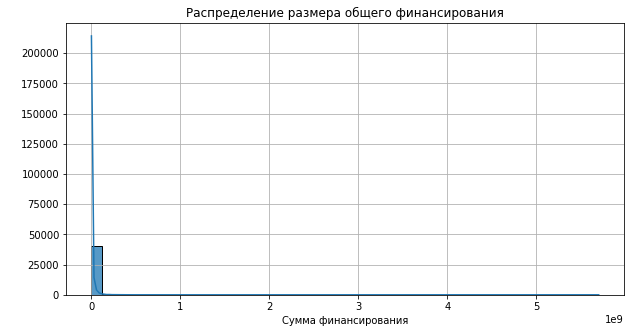

In [78]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
sns.histplot(
                data=company_and_acquisition,
                x='funding_total',
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                kde=True
)

# Настраиваем оформление графика
plt.title('Распределение размера общего финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel(' ')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Для большей информативности построим гистограмму в логарифмической шкале.

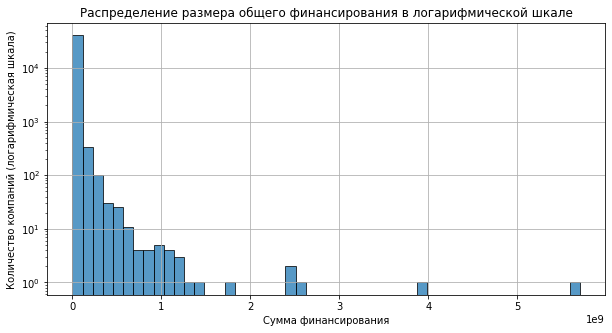

In [102]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
company_and_acquisition['funding_total'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
                logy=True
)

# Настраиваем оформление графика
plt.title('Распределение размера общего финансирования в логарифмической шкале')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний (логарифмическая шкала)')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

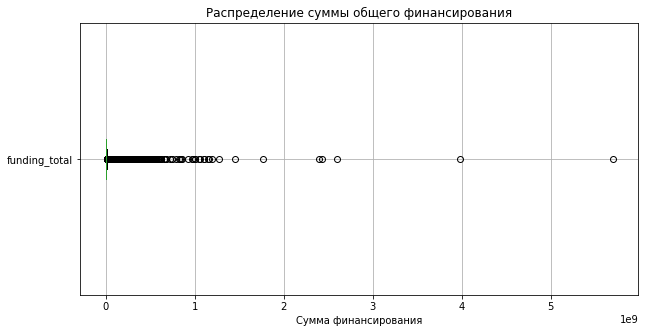

In [101]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха 
company_and_acquisition.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы общего финансирования')
plt.xlabel('Сумма финансирования')


# Выводим график
plt.show()

По полученным графикам видим, что большая часть сумм финансированиянаходится вблизи минимальных значений, а величина выбросов в зоне максимальных значений настолько велика, что очень сложно оценить данные.

Поэтому попробуем посмотреть на данные, убрав выбросы.

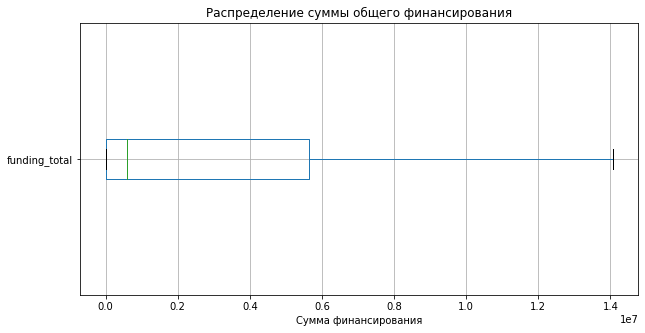

In [81]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха 
company_and_acquisition.boxplot(column='funding_total', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы общего финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()


По диаграмме разброса, построенной без выбросов, можно более точно оценить основную массу данных.

Получим, что наиболее типичные для компаний суммы финансирования находятся в пределах от 0 до 5,6 млн, а значения свыше будут являтся выбросами.

Также оценим долю нулевых значений в столбце.

In [82]:
# Посчитаем долю нулевых значений в столбце
print((company_and_acquisition['funding_total'] == 0).sum() / len(company_and_acquisition['funding_total']))

0.31724137931034485


Доля нулевых значений составляет 32%, что превышает значение нижнего квартиля.

В результате анализа можно сказать, что для данных этого датасета стандартное нахождение типичных значений малоинформативно из-за большой величины выбросов, и необходимо дополнительно изучить данные без влияния выбросов. Так же для увеличение наглядности отображения данных на некоторых графиках можно использовать логарифмическую шкалу.



### 3.3. Куплены забесплатно?



Для начала выделим компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования - для этого проведем фильтрацию нашей таблицы.

In [83]:
company_and_acquisition_filt = company_and_acquisition[
    (company_and_acquisition['funding_total'] > 0) &
    ((company_and_acquisition['price_amount'] == 0) |
    (company_and_acquisition['price_amount'] == 1))
]
display(company_and_acquisition_filt)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
66,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
170,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
177,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
181,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
184,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000.0,1.0,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196402,99.0,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.0,2.0,3900000.0,0.0,7024.0,317.0,99.0,NaN,0.0,2010-09-22
196411,9905.0,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.0,2.0,5172350.0,0.0,3381.0,41119.0,9905.0,NaN,0.0,2010-06-24
196430,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.0,1.0,10000000.0,1.0,9916.0,19182.0,992.0,NaN,0.0,2010-07-02
196489,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.0,1.0,14500000.0,3.0,9121.0,415.0,997.0,NaN,0.0,2013-07-15


Рассмотрим распределение данных о сумме общего финансирования для данной таблицы.

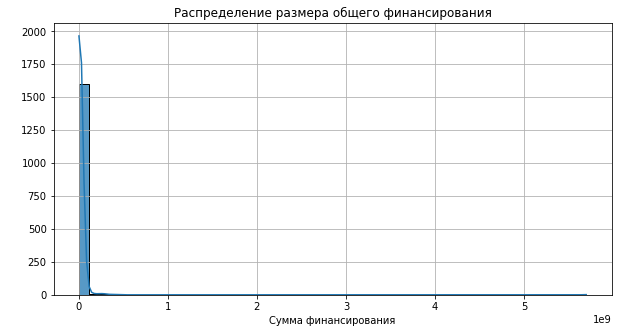

In [84]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
sns.histplot(
                data=company_and_acquisition_filt,
                x='funding_total',
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                kde=True
)

# Настраиваем оформление графика
plt.title('Распределение размера общего финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel(' ')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Такой вид графика не очень информативен, построим гистограмму с логарифмической у-шкалой.

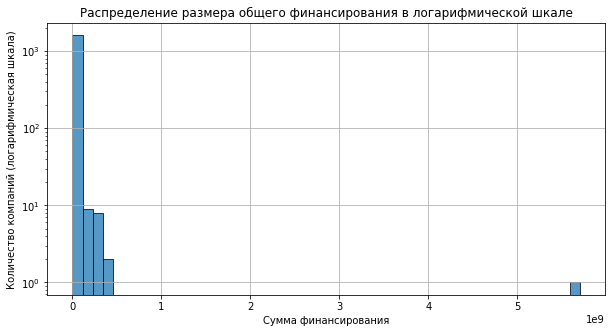

In [103]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
company_and_acquisition_filt['funding_total'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
                logy=True
)

# Настраиваем оформление графика
plt.title('Распределение размера общего финансирования в логарифмической шкале')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний (логарифмическая шкала)')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В соответствии с этим графиком можно более точно оценить основную часть информации о размере общего финансирования, которая составляет до 500 миллионов. Также отчётливо виден выброс, связанный с финансированием в размере около 5,7 миллиарда.

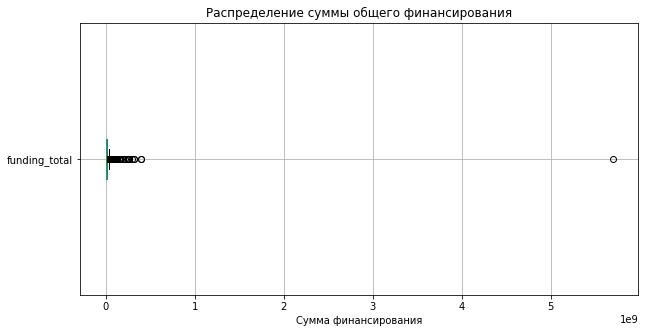

In [86]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха 
company_and_acquisition_filt.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы общего финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

На данные также влияют выбросы с большими значениями сумм финансирования.

Уберем выбросы и рассмотрим полученную диаграмму разброса

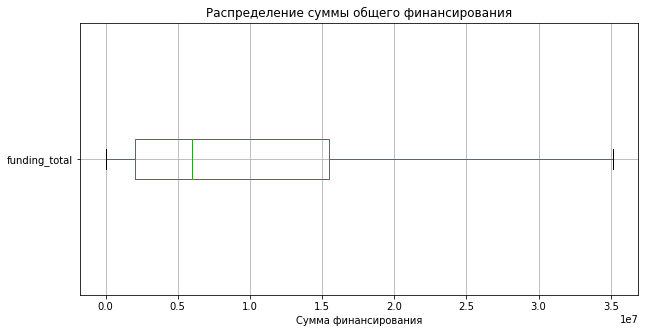

In [87]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха 
company_and_acquisition_filt.boxplot(column='funding_total', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы общего финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

Теперь, когда убраны нулевые значения и выбросы, видим, что основная часть данных наодится между 2 млн и 15,5 млн.

Расчитаем верхнюю и нижнюю границу выбросов с помощью метода межквартильного размаха (IQR), и определим процентили, которым они соответствуют.

In [88]:
# Рассчитываем квартили
Q1 = company_and_acquisition_filt['funding_total'].quantile(0.25)
Q3 = company_and_acquisition_filt['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

Нижняя граница выбросов: -18250000.0
Верхняя граница выбросов: 35750000.0


In [89]:
# Вычисляем процентили для границ
lower_percentile = (company_and_acquisition_filt['funding_total'] < lower_bound).mean() * 100
upper_percentile = (company_and_acquisition_filt['funding_total'] <= upper_bound).mean() * 100

print(f"Нижняя граница {lower_bound} соответствует {lower_percentile:.2f}% процентилю")
print(f"Верхняя граница {upper_bound} соответствует {upper_percentile:.2f}% процентилю")
print(f"Процент выбросов: {100 - upper_percentile + lower_percentile:.2f}%")

Нижняя граница -18250000.0 соответствует 0.00% процентилю
Верхняя граница 35750000.0 соответствует 90.91% процентилю
Процент выбросов: 9.09%


Определили, что нижняя граница выбросов равна **-18250000.0** и соответсвует **0%** процентилю (что видно из диаграммы разброса), а верхняя граница выбросов равна **35750000.0** и соответсвует **90.91%** процентилю.

Построим гистаграмму с отображенными границами выбросов

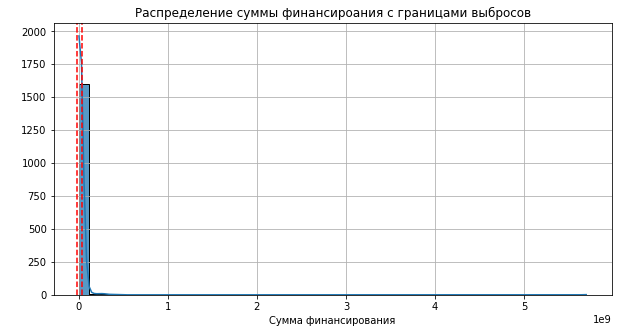

In [105]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
sns.histplot(
                data=company_and_acquisition_filt,
                x='funding_total',
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                kde=True
)

# Настраиваем оформление графика
plt.axvline(lower_bound, color='r', linestyle='--')
plt.axvline(upper_bound, color='r', linestyle='--')
plt.title(f'Распределение суммы финансироания с границами выбросов')
plt.xlabel('Сумма финансирования')
plt.ylabel(' ')


# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()



На этой гистограмме, отражающей распределение сумм финансирования с учётом границ выбросов, можно заметить, что основная часть данных о суммах финансирования значительно меньше по сравнению с объёмом выбросов.


### 3.4. Цены стартапов по категориям



Сгруппируем компании по категориям области деятельности, предварительно отфильтровав нулевые значения цен (для более верного расчета медианного значения цены), и для каждой категории определим медианное значение цены и разброс цен за стартап.

В качестве типичного показателя уровня цен будем использовать именно медианное значение, т.к. в отличие от среднего оно меньше реагирует на величину выбросов, которая в данной таблице имеют высокие значения.

In [91]:
# Сгруппируем компании по категориям и определим медианное значение цены и разброс цен за стартап
company_group = company_and_acquisition[company_and_acquisition['price_amount'] > 0].groupby(
    'category_code')['price_amount'].agg(['median', 'std']).sort_values(by=['median', 'std'], ascending=False)
display(company_group)

,median,std
category_code,,
automotive,2.400000e+09,2.581669e+09
sports,6.225000e+08,5.126524e+08
nanotech,5.840000e+08,NaN
real_estate,4.000000e+08,2.676302e+09
manufacturing,3.510000e+08,1.060435e+09
transportation,2.300000e+08,5.726255e+08
biotech,2.000000e+08,1.968195e+09
analytics,2.000000e+08,9.296774e+07
fashion,1.950000e+08,8.649422e+07


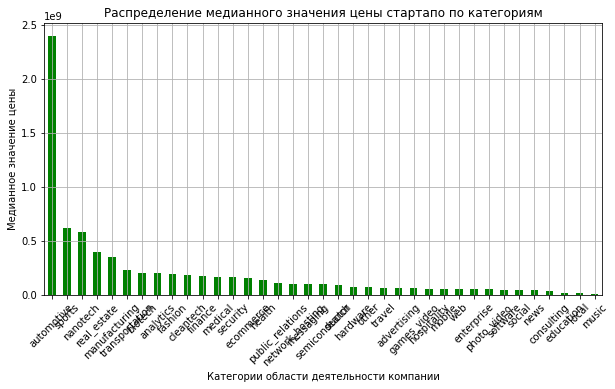

In [92]:
# Визуально отобразим полученные данные
company_group_median = company_and_acquisition[company_and_acquisition['price_amount'] > 0].groupby(
    'category_code')['price_amount'].median().sort_values(ascending=False)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
company_group_median.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение медианного значения цены стартапо по категориям',
               color='green' #настраиваем цвет графика
)


# Настраиваем оформление графика
plt.ylabel('Медианное значение цены')
plt.xlabel('Категории области деятельности компании')  
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Выделим из полученного списка топ-5 категорий стартапов с самыми высокими ценами и самыми большими разбросами цен.

In [93]:
# Выделим топ-5 категорий
company_group_top = company_group.head(5)
display(company_group_top)

,median,std
category_code,,
automotive,2.400000e+09,2.581669e+09
sports,6.225000e+08,5.126524e+08
nanotech,5.840000e+08,NaN
real_estate,4.000000e+08,2.676302e+09
manufacturing,3.510000e+08,1.060435e+09


Получили, что в список категорий стартапов с самыми высокими ценами и наибольшим разбросом цен вошли следующие категории области деятельности:

 - автомобилестроение (средняя цена составляет 2,4 млрд, разброс цен составляет 2,6 млрд);
 - спорт (средняя цена составляет 622 млн, разброс цен составляет 512 млн);
 - нанотехнологии (средняя цена составляет 584 млн, разброс цен неизвестен);
 - недвижимость (средняя цена составляет 400 млн, разброс цен составляет 2,7 млрд);
 - производство (средняя цена составляет 351 млн, разброс цен составляет 1 млрд);
 


### 3.5. Сколько раундов продержится стартап перед покупкой




Для начала изучим статистические показатели столбца `funding_rounds`, чтобы понять как определять типичное значение раундов для каждого возможного статуса стартапа.

In [94]:
# Изучаем статистические показатели столбца funding_rounds
print('Статистические показатели столбца funding_rounds:')
company_and_acquisition['funding_rounds'].describe()

Статистические показатели столбца funding_rounds:


count    40890.000000
mean         1.289313
std          1.264921
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

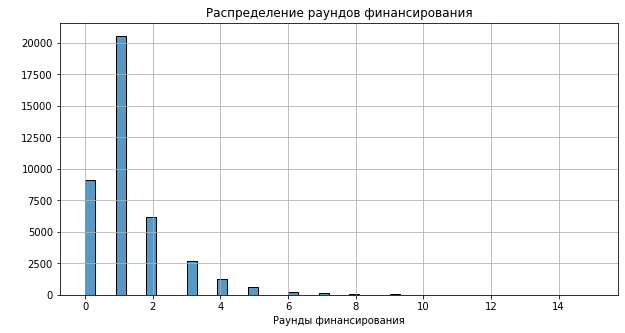

In [95]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
sns.histplot(
                data=company_and_acquisition,
                x='funding_rounds',
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black'
)

# Настраиваем оформление графика
plt.title('Распределение раундов финансирования')
plt.xlabel('Раунды финансирования')
plt.ylabel(' ')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По полученным данным видим, что значение среднего и медианы близки, но среднее все же немного выше медианы (1,29 > 1), это говорит о сдвинутом вправо распределении. Значение медианы (1) и верхнего квартиля (2) показывают, что большинство значений количества раундов финансирования небольшие, но есть и выбросы вплоть до 15 раундов. Также наблюдаем достаточно большое количество нулевых значений.

Учитывая полученные статистические данные, для определения типичного значения раундов для каждого статуса будем использовать медианное значение, так как оно не так сильно зависит от больших значений выбросов, которые присутствуют в наших данных. Но предварительно отфильтруем нулевые значения раундов, т.к. нулевые значения сильно влияют на медианное значение.

Чтобы определить типичное значение количества раундов для каждого возможного статуса стартапа, сгруппируем данные по статусам и для каждого конкретного статуса определим медианное значение количества раундов.

In [96]:
# Сгруппируем компании по статусам стартапов, исключив нулевое значение раундов, и определим медианное значение количества раундов
rounds_group_median = company_and_acquisition[company_and_acquisition['funding_rounds'] > 0].groupby(
    'status')['funding_rounds'].median().sort_values(ascending=False)
display(rounds_group_median)

status
ipo          2.0
acquired     1.0
closed       1.0
operating    1.0
Name: funding_rounds, dtype: float64

Видим, что медианное значение дает практически одинаковый результат для каждого статуса, за исключением статуса IPO, и не позволяет оценить распределение типичного количества раундов финансирования для разных статусов стартапов.

Посчитаем среднее значение для каждого статуса и сравним результаты.

In [97]:
# Сгруппируем компании по статусам стартапов, исключив нулевое значение раундов, и определим среднее значение количества раундов
rounds_group_mean = company_and_acquisition[company_and_acquisition['funding_rounds'] > 0].groupby(
    'status')['funding_rounds'].mean().sort_values(ascending=False)
display(rounds_group_mean)

status
ipo          2.526531
acquired     1.897766
operating    1.642359
closed       1.383437
Name: funding_rounds, dtype: float64

Отобразим полученные данные на диаграмме и выведем уровень общего среднего значения количества раундов финансирования.

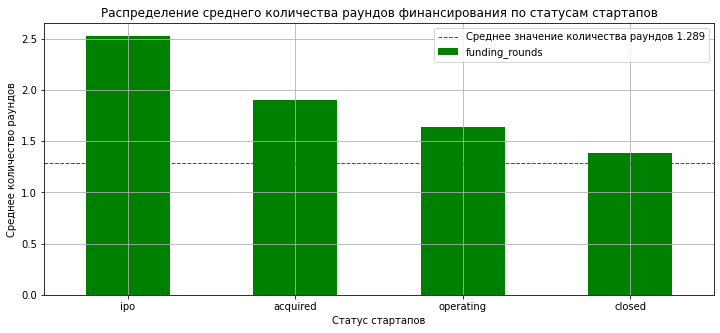

In [98]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
rounds_group_mean.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               title=f'Распределение среднего количества раундов финансирования по статусам стартапов',
               color='green' #настраиваем цвет графика
)
plt.axhline(1.289, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Среднее значение количества раундов 1.289')

# Настраиваем оформление графика
plt.ylabel('Среднее количество раундов')
plt.xlabel('Статус стартапов')  
# Добавляем сетку графика
plt.grid()
plt.legend()

# Выводим график
plt.show()

По полученным данным и диаграмме видим, что для всех статусов стартапов среднее количество раундов финансирования выше общего среднего (1.289), и наблюдаем следуещее распределение по величине среднего количества раундов:

 - `IPO` и `acquired` (успешные стартапы) имеют наибольшее среднее количество раундов (**2.52** и **1.89** соответсвенно), что логично — успешные компании привлекают больше инвестиций.

 - `operating` (действующие стартапы) - среднее значение составляет **1.64**.

 - `сlosed` (закрытые стартапы) имеют самое низкое среднее (**1.38**), что согласуется с их неудачным развитием.

### Промежуточный вывод

В ходе изучения данных были осуществлены следующие действия:
- объеденены и отфильтрованы данные для дальнейшего анализа - получена таблица, содержащая основные данные о 40890 компаниях;
- определены наиболее типичные суммы финансирования компаний и величина выбросов, а также доля компаний с нулевым финансированием;
- проанализированны компании, проданные за 0 или 1$ и определены для них границы выбросов;
- определены 5 категорий стартапов с самыми высокими ценами и наибольшим разбросом цен;
- определено среднее количество раундов финансирования для каждого статуса стартапа;
- выявлено, что среднее количество раундов финансирования для каждого статуса стартапа превышает общее среднее значение количество раундов (1.289).




## Шаг 4. Итоговый вывод и рекомендации



### 1. Общий обзор проделанной работы

В ходе исследования были проанализированны данные 196'554 компаний-стартапов. Исследуемая информация включала сведения о самих компаниях, раундах финансирования, данные о персонале компаний и уровне их образования.

Основное внимание в исследовании было уделено подготовке датасета и проверке корректности предоставленных данных, а также  необходимо было ответить на вопросы заказчика о предобработке и значении данных для бизнеса.

### 2. Главные выводы

Проведя анализ предоставленных данных был определен максимальный типичный размер средств, которые стартапы получали в рамках одного раунда финансирования, он составлял **5'500'000** и наблюдался в **2005** году.

Так же по результатам графического анализа п. 2.1 можно сделать вывод, что в 2005  году произошло резкое увеличение количества стартапов (более чем в 5 раз) и сформировалась новая схема финансирования - увеличением количества раундов финансирования и уменьшением суммы каждого. 

Вычисления показали, что во **всех** категориях стартапов, независимо от численности сотрудников, доля тех, кто не указал уровень образования, довольно велика - **более 40%**.

Минимальная доля таких сотрудников наблюдается для микростартапов (2 сотрудника) - **41%**. Максимальная доля наблюдается для стартапов из 1 сотрудника - **67%**.

При этом доля сотрудников без информации об образовании увеличивается с увеличением размера компании, за исключением стартапов из 1 человека.

Наиболее типичные для компаний суммы финансирования находятся в пределах до **5.6 млн**, но есть и компании, сумма финансрования которых значительно больше - некоторые значения достигают суммы **5.7 млрд**. Также велика доля нулевых значений сумм финансироавня - **32%**, это говорит о том, что почти треть изученных стартапов не получили финансирования по различным причинам.

Были изучены компании, проданные за 0 или 1$, для них наиболее частые суммы финансирования находятся в пределах между **2 млн** и **15.5 млн**, но также есть и компании, сумма финансрования которых значительно больше - некоторые значения достигают суммы **5.7 млрд**.

Для компаний с ненулевой суммой продажи составлен топ-5 категорий области деятельности компаний с максимальной средней ценой и наибольшим размахом цен. В него вошли следующие категории:
 - автомобилестроение;
 - спорт;
 - нанотехнологии;
 - недвижимость;
 - производство.

По полученным при анализе данным **наибольшее** среднее количество раундов финансирования прошли компании со статусом **IPO** - 2.52 раунда, а **самый низкий** показатель среднего количества раундов финансирования отмечен у компаний со статусом **сlosed** и составляет 1.38.

Также можно отметить, что для всех статусов стартапов среднее количество раундов финансирования выше общего среднего (1.289).

### 3. Рекомендации

На основе проанализированных данных можно дать следующие рекомендации:

- При выборе категории деятельности стартапа стоит ориентироваться на полученный ТОП-5 по стоимости.
- При выборе стартапа стоит обратить внимание на те проекты, которые уже получили хотя бы 1 раунд финансирования, так как такие проекты подтвердили свою привлекательность привлечением финансирования.
- При финансовом планировании нужно ориентировать на среднестатические показатели в 2-3 раунда финансирования общим размером ~5.6 млн. Потенциально высокие шансы встретить интересный для инвестирования проект с требуемым финансированием на порядки превышающим средний размер финансирования.
- Данные об образовании сотрудников не рекомендуется рассматривать как один из основных факторов, так как в предоставленных данных  присутствует большое количество пропусков этого параметра.